In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("ThoracicSurgery.csv")

In [3]:
df.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [4]:
df.tail()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
449,2,3.88,2.12,1,0,0,0,1,0,3,0,0,0,1,0,63,0
450,3,3.76,3.12,0,0,0,0,0,0,1,0,0,0,1,0,61,0
451,3,3.04,2.08,1,0,0,0,1,0,3,0,0,0,0,0,52,0
452,3,1.96,1.68,1,0,0,0,1,1,2,0,0,0,1,0,79,0
453,3,4.72,3.56,0,0,0,0,0,0,2,0,0,0,1,0,51,0


In [5]:
df.columns

Index(['Diagnosis', 'FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis',
       'Dyspnoea', 'Cough', 'Weakness', 'Tumor_Size', 'Diabetes_Mellitus',
       'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age', 'Death_1yr'],
      dtype='object')

In [6]:
df

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,2,3.88,2.12,1,0,0,0,1,0,3,0,0,0,1,0,63,0
450,3,3.76,3.12,0,0,0,0,0,0,1,0,0,0,1,0,61,0
451,3,3.04,2.08,1,0,0,0,1,0,3,0,0,0,0,0,52,0
452,3,1.96,1.68,1,0,0,0,1,1,2,0,0,0,1,0,79,0


In [7]:
df.describe()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
count,454.000000,454.000000,454.00000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,3.092511,3.287952,2.51685,0.795154,0.059471,0.136564,0.055066,0.696035,0.171806,1.733480,0.074890,0.004405,0.017621,0.828194,0.004405,62.777533,0.151982
std,0.715817,0.872347,0.77189,0.531459,0.236766,0.343765,0.228361,0.460475,0.377628,0.707499,0.263504,0.066299,0.131715,0.377628,0.066299,8.449634,0.359400
min,1.000000,1.440000,0.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000
25%,3.000000,2.600000,1.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.000000,3.160000,2.36000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.000000,3.840000,2.97750,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,8.000000,6.300000,5.48000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [8]:
df.shape

(454, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Diagnosis          454 non-null    int64  
 1   FVC                454 non-null    float64
 2   FEV1               454 non-null    float64
 3   Performance        454 non-null    int64  
 4   Pain               454 non-null    int64  
 5   Haemoptysis        454 non-null    int64  
 6   Dyspnoea           454 non-null    int64  
 7   Cough              454 non-null    int64  
 8   Weakness           454 non-null    int64  
 9   Tumor_Size         454 non-null    int64  
 10  Diabetes_Mellitus  454 non-null    int64  
 11  MI_6mo             454 non-null    int64  
 12  PAD                454 non-null    int64  
 13  Smoking            454 non-null    int64  
 14  Asthma             454 non-null    int64  
 15  Age                454 non-null    int64  
 16  Death_1yr          454 non

In [10]:
df.isnull().sum()

Diagnosis            0
FVC                  0
FEV1                 0
Performance          0
Pain                 0
Haemoptysis          0
Dyspnoea             0
Cough                0
Weakness             0
Tumor_Size           0
Diabetes_Mellitus    0
MI_6mo               0
PAD                  0
Smoking              0
Asthma               0
Age                  0
Death_1yr            0
dtype: int64

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
live=df[df['Death_1yr']==0]
death=df[df['Death_1yr']==1]

cond=['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis',
       'Dyspnoea', 'Cough', 'Weakness', 'Tumor_Size', 'Diabetes_Mellitus',
       'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']
l=[np.mean(live[c]) for c in cond]
d=[np.mean(death[c]) for c in cond]

ld=pd.DataFrame(data={'Attribute':cond,'Live 1yr Mean':l,'Death 1yr Mean':d})
ld=ld.set_index('Attribute')

print('Death: {:d}'.format(len(death),len(live)))
print('Live: {:d}'.format(len(live),len(death)))
print("1 year death: {:.2f}% out of 454 patients".format(np.mean(df.Death_1yr)*100))
ld

Death: 69
Live: 385
1 year death: 15.20% out of 454 patients


,Live 1yr Mean,Death 1yr Mean
Attribute,,
FVC,3.304597,3.195072
FEV1,2.540805,2.383188
Performance,0.774026,0.913043
Pain,0.051948,0.101449
Haemoptysis,0.124675,0.202899
Dyspnoea,0.044156,0.115942
Cough,0.677922,0.797101
Weakness,0.158442,0.246377
Tumor_Size,1.683117,2.014493


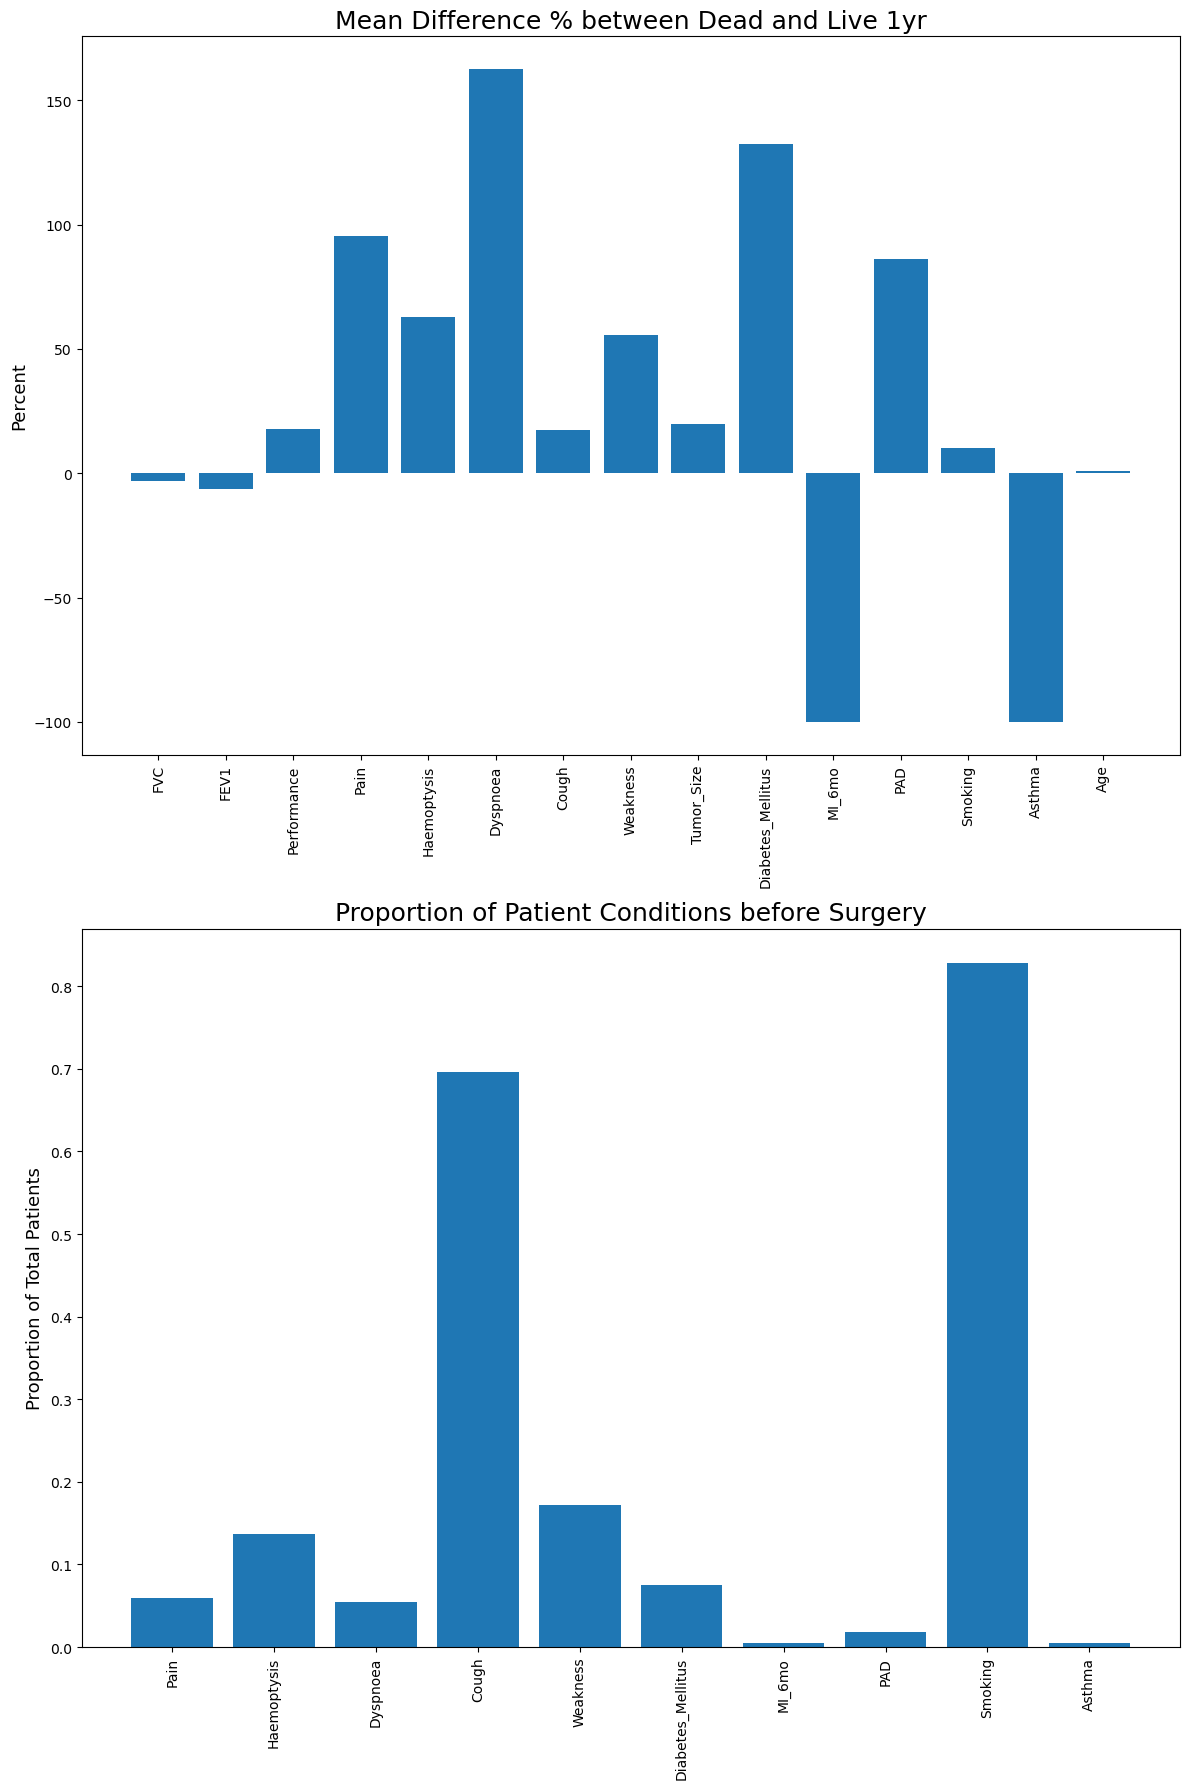

In [13]:
#HOW MANY PATIENTS DIED IN 1 YEAR
#PERCENTAGE DIFFERENCE IN MEANS OF LIVE VS DEATH PATIENTS
d=np.array(d)
l=np.array(l)
p_diff=(d-l)/l*100

fig,axes=plt.subplots(2,1,figsize=(12,18))
axes[0].bar(cond,p_diff)
axes[0].set_title('Mean Difference % between Dead and Live 1yr',fontsize=18)
axes[0].set_xticks(cond)
axes[0].set_xticklabels(cond,rotation=90)
axes[0].set_ylabel('Percent',fontsize=13)

#COUNT PLOTS OF TRUE/FALSE CONDITION COLUMNS
tf_col=['Pain','Haemoptysis','Dyspnoea','Cough','Weakness','Diabetes_Mellitus','MI_6mo','PAD','Smoking','Asthma']
tf_sum=[df[col].sum()/454 for col in tf_col]

axes[1].bar(tf_col,tf_sum)
axes[1].set_xticks(tf_col)
axes[1].set_xticklabels(tf_col,rotation=90)
axes[1].set_ylabel('Proportion of Total Patients',fontsize=13)
axes[1].set_title('Proportion of Patient Conditions before Surgery',fontsize=18)

plt.tight_layout()

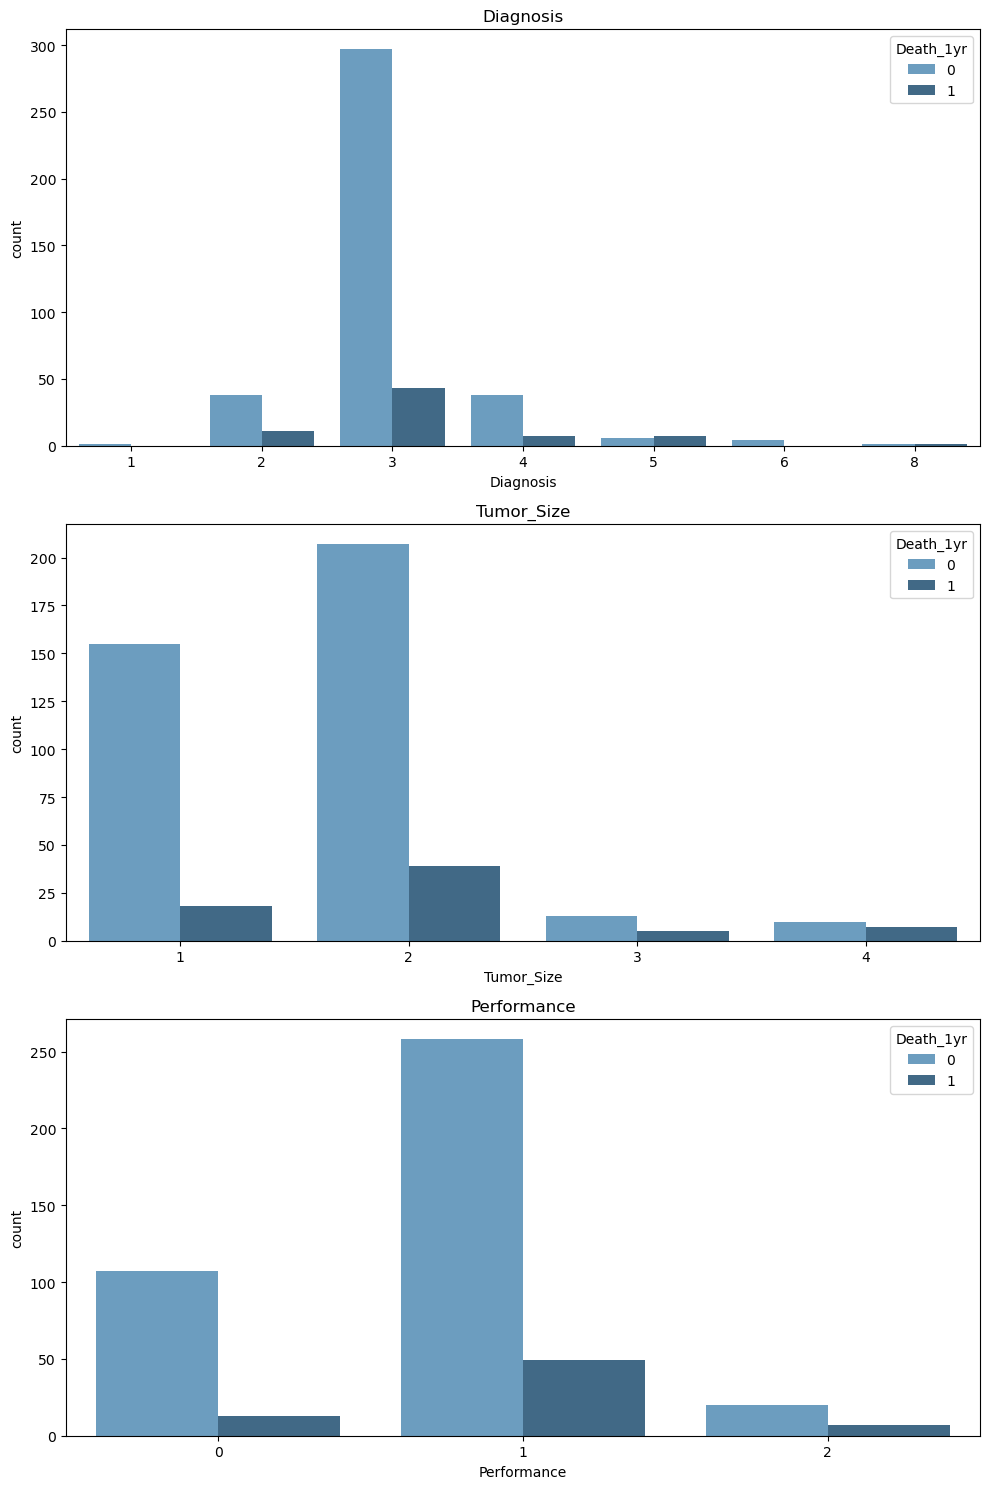

In [14]:
#Categorical Data(Diagnosis,Tumor_Size,Performance)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.countplot(x='Diagnosis', hue='Death_1yr', data=df, palette='Blues_d', ax=axes[0])
axes[0].set_title('Diagnosis')

sns.countplot(x='Tumor_Size', hue='Death_1yr', data=df, palette='Blues_d', ax=axes[1])
axes[1].set_title('Tumor_Size')

sns.countplot(x='Performance', hue='Death_1yr', data=df, palette='Blues_d', ax=axes[2])
axes[2].set_title('Performance')

plt.tight_layout()
plt.show()


In [15]:
def permutation_sample(data1,data2):
    data=np.concatenate((data1,data2))
    permuted_data=np.random.permutation(data)
    
    perm_sample_1=permuted_data[:len(data1)]
    perm_sample_2=permuted_data[len(data2):]
    
    return perm_sample_1,perm_sample_2

In [16]:
condition=['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis',
       'Dyspnoea', 'Cough', 'Weakness', 'Tumor_Size', 'Diabetes_Mellitus',
       'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']
import numpy as np

def diff_of_means(data1, data2):
    """Difference in means of two arrays."""
    return np.mean(data1) - np.mean(data2)

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2

def draw_perm_reps(data1, data2, func, size=1):
    """Generate multiple permutation replicates."""
    perm_replicates = np.empty(size)  # Initialize perm_replicates as an empty array of size 'size'
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data1, data2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

# Assuming 'death' and 'live' are pandas DataFrames and 'condition' is a list of columns
for c in condition:
    empirical_diff_means = diff_of_means(death[c], live[c])
    perm_replicates = draw_perm_reps(death[c], live[c], diff_of_means, size=10000)
    if empirical_diff_means > 0:
        p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
    else:
        p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)
    print(f"p-value for {c}: {p}")

        

p-value for FVC: 0.1672
p-value for FEV1: 0.0608
p-value for Performance: 0.0283
p-value for Pain: 0.0999
p-value for Haemoptysis: 0.0647
p-value for Dyspnoea: 0.024
p-value for Cough: 0.0297
p-value for Weakness: 0.0575
p-value for Tumor_Size: 0.0002
p-value for Diabetes_Mellitus: 0.0195
p-value for MI_6mo: 0.7225
p-value for PAD: 0.3482
p-value for Smoking: 0.0627
p-value for Asthma: 0.7294
p-value for Age: 0.2787


In [17]:
condition=['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis',
       'Dyspnoea', 'Cough', 'Weakness', 'Tumor_Size', 'Diabetes_Mellitus',
       'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']
p_val=[]
for c in condition:
    empirical_diff_means=diff_of_means(death[c],live[c])
    perm_replicates=draw_perm_reps(death[c],live[c],diff_of_means,size=10000)
    if empirical_diff_means>0:
        p=np.sum(perm_replicates>= empirical_diff_means)/len(perm_replicates)
        p_val.append(p)
    else:
        p=np.sum(perm_replicates <= empirical_diff_means)/len(perm_replicates)
        p_val.append(p)
print(list(zip(condition,p_val)))

[('FVC', 0.1701), ('FEV1', 0.0581), ('Performance', 0.0272), ('Pain', 0.0991), ('Haemoptysis', 0.0673), ('Dyspnoea', 0.0212), ('Cough', 0.0293), ('Weakness', 0.0593), ('Tumor_Size', 0.0005), ('Diabetes_Mellitus', 0.0208), ('MI_6mo', 0.7189), ('PAD', 0.3528), ('Smoking', 0.0648), ('Asthma', 0.7148), ('Age', 0.2806)]


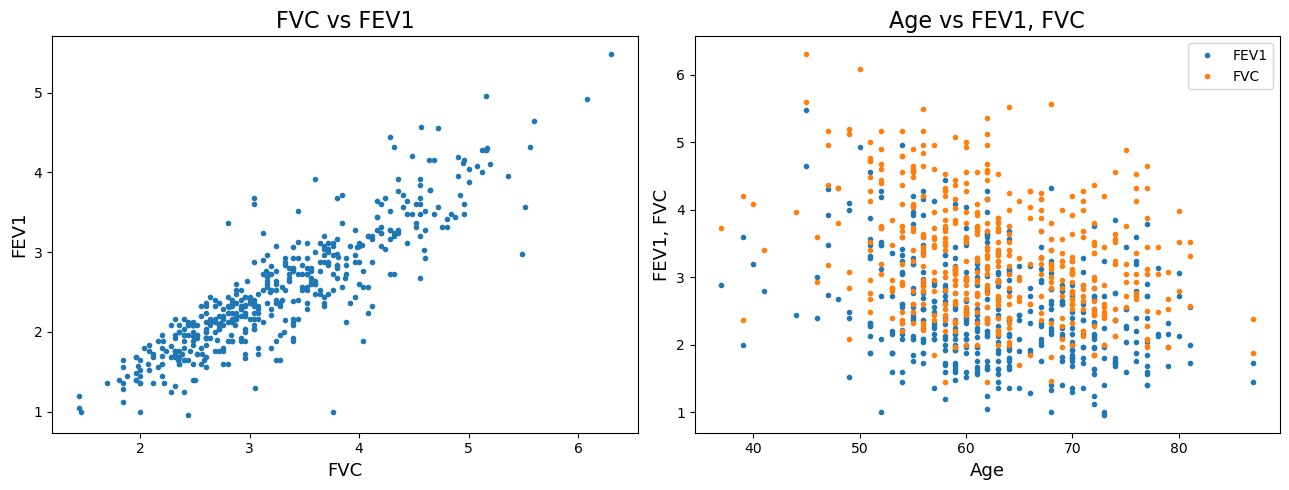

In [18]:
#Numerical data(Age,FVC,FEV1)
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it contains columns 'FVC', 'FEV1', and 'Age'
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Plot FVC vs FEV1
axes[0].plot(df.FVC, df.FEV1, linestyle='none', marker='.')
axes[0].set_xlabel('FVC', fontsize=13)
axes[0].set_ylabel('FEV1', fontsize=13)
axes[0].set_title('FVC vs FEV1', fontsize=16)

# Plot Age vs FEV1 and Age vs FVC
axes[1].plot(df.Age, df.FEV1, linestyle='none', marker='.', label='FEV1')
axes[1].plot(df.Age, df.FVC, linestyle='none', marker='.', label='FVC')
axes[1].set_xlabel('Age', fontsize=13)
axes[1].set_ylabel('FEV1, FVC', fontsize=13)
axes[1].legend()
axes[1].set_title('Age vs FEV1, FVC', fontsize=16)

plt.tight_layout()
plt.show()


In [19]:
#Correlation coefficients for FVC and FEV1
np.corrcoef(df.FVC,df.FEV1)[0,1]

0.8875452733829001

In [20]:
#Correlation coefficients for Age and FVC
np.corrcoef(df.Age,df.FVC)[0,1]

-0.2994299196604911

In [21]:
#correlation coefficients for Age and FEV1
np.corrcoef(df.Age,df.FEV1)[0,1]

-0.30961662730798917

In [22]:
#Correlations of FVC,FEV1 and Age
def ecdf(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x,y

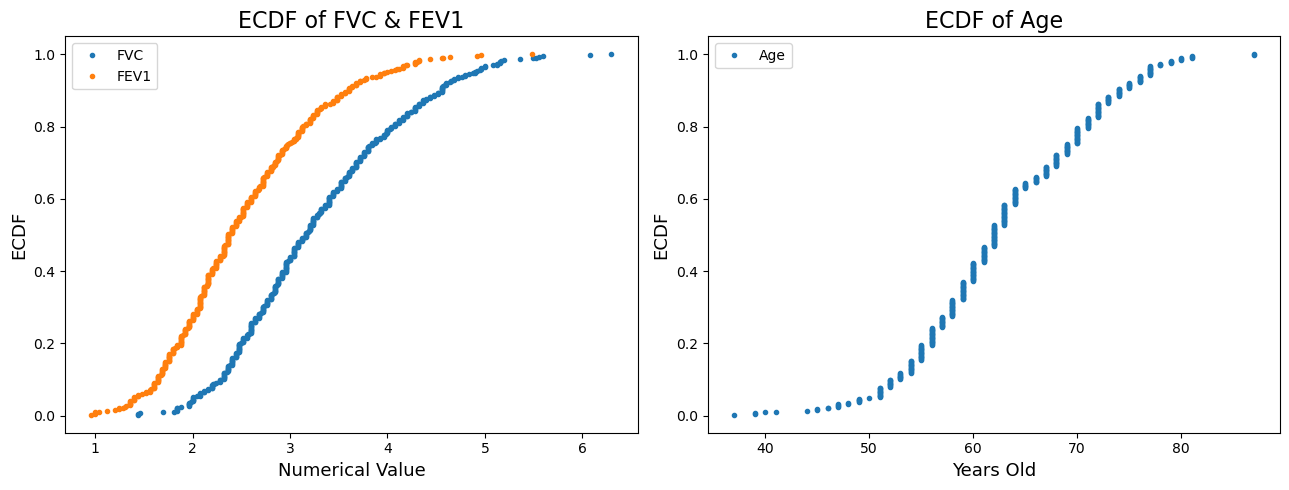

In [23]:
#ECDF of FVC,FEV1,Age
x_fvc,y_fvc=ecdf(df.FVC)
x_fev1,y_fev1=ecdf(df.FEV1)
x_age,y_age=ecdf(df.Age)

fig,axes=plt.subplots(1,2,figsize=(13,5))
axes[0].plot(x_fvc,y_fvc,marker='.',linestyle='none',label='FVC')
axes[0].plot(x_fev1,y_fev1,marker='.',linestyle='none',label='FEV1')

axes[0].set_xlabel('Numerical Value',fontsize=13)
axes[0].set_ylabel('ECDF',fontsize=13)
axes[0].legend(loc='upper left')
axes[0].set_title('ECDF of FVC & FEV1',fontsize=16)

axes[1].plot(x_age,y_age,marker='.',linestyle='none',label='Age')
axes[1].set_xlabel('Years Old',fontsize=13)
axes[1].set_ylabel('ECDF',fontsize=13)
axes[1].legend(loc='upper left')
axes[1].set_title('ECDF of Age',fontsize=16)
plt.tight_layout()

In [24]:
x=df.iloc[:,0:15].values
y=df.iloc[:,15:16].values

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
print('Shape of x_train {}'.format(x_train.shape))
print('Shape of y_train {}'.format(y_train.shape))
print('Shape of x_test {}'.format(x_test.shape))
print('Shape of y_test {}'.format(y_test.shape))

Shape of x_train (363, 15)
Shape of y_train (363, 1)
Shape of x_test (91, 15)
Shape of y_test (91, 1)


In [27]:
from sklearn.preprocessing import StandardScaler

# Standard scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

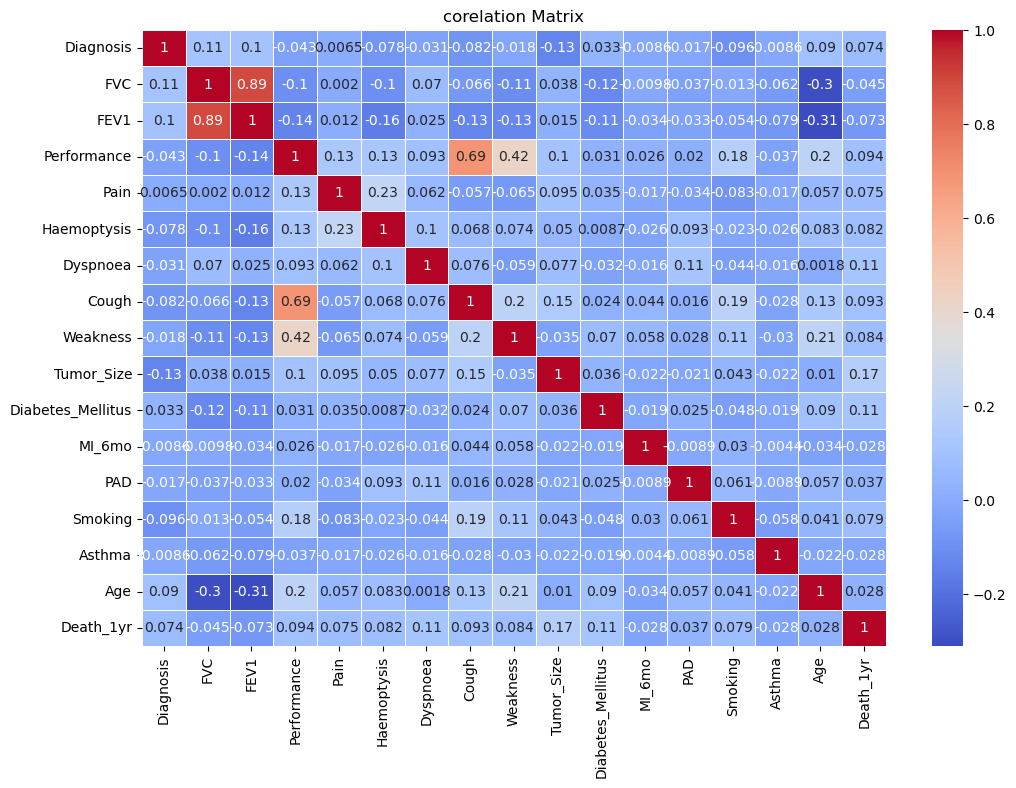

In [28]:
correlation_matrix=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('corelation Matrix')
plt.show()

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import itertools
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load your dataset
df = pd.read_csv('ThoracicSurgery.csv')

# Feature selection
# Select features relevant for prediction
features = ['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis', 'Dyspnoea',
            'Cough', 'Weakness', 'Tumor_Size', 'Diabetes_Mellitus', 'MI_6mo',
            'PAD', 'Smoking', 'Asthma', 'Age']
target = 'Death_1yr'

# Prepare the data
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}
# Train and evaluate classifiers
results = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    results.append({
        'Classifier': name,
        'Accuracy': accuracy,
        'F1 Score': f1
    })
    
    print(f'Classifier: {name}')
    print(f'Accuracy: {accuracy}')
    print(f'F1 Score: {f1}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    print(cm)
    
# Print summary of results
results_df = pd.DataFrame(results)
print(results_df)


Classifier: Logistic Regression
Accuracy: 0.8351648351648352
F1 Score: 0.7601500296111074
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        76
           1       0.00      0.00      0.00        15

    accuracy                           0.84        91
   macro avg       0.42      0.50      0.46        91
weighted avg       0.70      0.84      0.76        91

Confusion Matrix:
[[76  0]
 [15  0]]
Classifier: Random Forest
Accuracy: 0.8351648351648352
F1 Score: 0.7601500296111074
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        76
           1       0.00      0.00      0.00        15

    accuracy                           0.84        91
   macro avg       0.42      0.50      0.46        91
weighted avg       0.70      0.84      0.76        91

Confusion Matrix:
[[76  0]
 [15  0]]
Classifier: Gradient Boosting
Accuracy: 0.8241758241

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.preprocessing import StandardScaler
import pickle

# Ignore warnings
warnings.filterwarnings('ignore')

# Load your dataset
df = pd.read_csv('ThoracicSurgery.csv')

# Feature selection
features = ['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis', 'Dyspnoea',
            'Cough', 'Weakness', 'Tumor_Size', 'Diabetes_Mellitus', 'MI_6mo',
            'PAD', 'Smoking', 'Asthma', 'Age']
target = 'Death_1yr'

# Prepare the data
X = df[features]
y = df[target]

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning with more values
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

# Get the best estimator
best_rf = grid_search.best_estimator_

# Save the model and scaler to pickle files
with open('best_random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Make predictions with the best estimator
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(cm)


Fitting 5 folds for each of 2880 candidates, totalling 14400 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.8512557077625571
Accuracy: 0.8351648351648352
F1 Score: 0.7601500296111074
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        76
           1       0.00      0.00      0.00        15

    accuracy                           0.84        91
   macro avg       0.42      0.50      0.46        91
weighted avg       0.70      0.84      0.76        91

Confusion Matrix:
[[76  0]
 [15  0]]


In [32]:
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler

# Load the model and scaler from the pickle files
with open('best_random_forest_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

# Example new data for prediction (replace with actual data)
new_data = np.array([[2.88,2.16,1, 0, 0, 0, 1, 1, 4, 0, 0, 0, 1, 0, 60]])

# Normalize the new data using the loaded scaler
new_data_normalized = loaded_scaler.transform(new_data)

# Make prediction with the loaded model
new_prediction = loaded_model.predict(new_data_normalized)

print(f'Prediction for new data: {new_prediction}')


Prediction for new data: [0]


In [33]:
new_data = np.array([[2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73]])

# Normalize the new data using the loaded scaler
new_data_normalized = loaded_scaler.transform(new_data)

# Make prediction with the loaded model
new_prediction = loaded_model.predict(new_data_normalized)

print(f'Prediction for new data: {new_prediction}')


Prediction for new data: [1]
